In [ ]:
!pip install geopandas
!pip install geojson

     |████████████████████████████████| 972kB 2.9MB/s 
     |████████████████████████████████| 14.8MB 287kB/s 
     |████████████████████████████████| 10.9MB 42.1MB/s 


In [ ]:
import geopandas as gpd
import geojson as gjs
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/Team\ 80\ DS4A/Secretaría\ de\ Movilidad\ -\ SGV/Data\ ejemplo/Conteo\ vehiculos/

 Conteo_Vehiculos_CGT_Bogot%C3%A1_D_C.geojson  'Volumenes 09 de septiembre.xls'
'Volumenes 08 de septiembre.xls'


In [ ]:
df_volumes_08_sep_text = pd.read_excel('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Conteo vehiculos/Volumenes 08 de septiembre.xls',nrows=1,header=None, usecols=[0])
df_volumes_08_sep = pd.read_excel('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Conteo vehiculos/Volumenes 08 de septiembre.xls',skiprows=1)

df_volumes_09_sep_text = pd.read_excel('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Conteo vehiculos/Volumenes 09 de septiembre.xls',nrows=1,header=None, usecols=[0])
df_volumes_09_sep = pd.read_excel('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Conteo vehiculos/Volumenes 09 de septiembre.xls',skiprows=1)

# geojson
df_geo = gpd.read_file("/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Conteo vehiculos/Conteo_Vehiculos_CGT_Bogot%C3%A1_D_C.geojson")


In [ ]:
df_volumes_08_sep.columns

Index(['Time (Beginning of Interval)', 'Avg Occup (%)', 'Total Volume',
       'Median Speed (km/h)', 'Avg Avg Speed (km/h)',
       'Volume where length 0<=X<6m', 'Volume where length 6<=X<11m',
       'Volume where length 11+m'],
      dtype='object')

In [ ]:
aux = str(df_volumes_08_sep_text[0][0])
sensor_zone = re.search(r"'(.*)'", aux)[0].replace("'","")

#Delete the last row
df_volumes_08_sep = df_volumes_08_sep[df_volumes_08_sep['Time (Beginning of Interval)'] != 'Grand Total']
##Get the name of the sensor
df_volumes_08_sep['sensor_zone'] = sensor_zone

df_volumes_08_sep.head()

,Time (Beginning of Interval),Avg Occup (%),Total Volume,Median Speed (km/h),Avg Avg Speed (km/h),Volume where length 0<=X<6m,Volume where length 6<=X<11m,Volume where length 11+m,sensor_zone
0,09/08/2020 00:00,1.41,231,NaN,56,64,59,82,AutoNorte x Calle 192 Sur-Norte
1,09/08/2020 01:00,0.90,148,NaN,53,36,42,49,AutoNorte x Calle 192 Sur-Norte
2,09/08/2020 02:00,0.66,130,NaN,58,42,44,31,AutoNorte x Calle 192 Sur-Norte
3,09/08/2020 03:00,1.13,232,NaN,57,84,61,52,AutoNorte x Calle 192 Sur-Norte
4,09/08/2020 04:00,3.26,616,NaN,55,248,154,137,AutoNorte x Calle 192 Sur-Norte


**Anotaciones sobre features**
- Total volume para trabajar
- Avg. Occup (%): Pedir el manual (Mateo)
- Reunión para revisar hallazgos
- Cuales de los 22 (9) son exactamente los que son confiables?
- Mes de Septiembre para realizar los cálculos? Pandemia o antes?

In [ ]:
aux = str(df_volumes_09_sep_text[0][0])
sensor_zone = re.search(r"'(.*)'", aux)[0].replace("'","")

#Delete the last row
df_volumes_09_sep = df_volumes_09_sep[df_volumes_09_sep['Time (Beginning of Interval)'] != 'Grand Total']
##Get the name of the sensor
df_volumes_09_sep['sensor_zone'] = sensor_zone

df_volumes_09_sep.head()

,Time (Beginning of Interval),Avg Occup (%),Total Volume,Median Speed (km/h),Avg Avg Speed (km/h),Volume where length 0<=X<6m,Volume where length 6<=X<11m,Volume where length 11+m,sensor_zone
0,09/09/2020 00:00,1.59,241,NaN,55,68,52,92,AutoNorte x Calle 192 Sur-Norte
1,09/09/2020 01:00,0.70,133,NaN,59,42,44,34,AutoNorte x Calle 192 Sur-Norte
2,09/09/2020 02:00,0.62,119,NaN,61,43,24,36,AutoNorte x Calle 192 Sur-Norte
3,09/09/2020 03:00,1.49,254,NaN,60,77,79,70,AutoNorte x Calle 192 Sur-Norte
4,09/09/2020 04:00,3.35,643,NaN,55,263,182,136,AutoNorte x Calle 192 Sur-Norte


In [ ]:
df_geo

,OBJECTID,SITE_ID,UPDATE_AT,NAME,ORIENTATION,geometry
0,1,25000,2019-09-23T21:10:35+00:00,Crr 86 - Cll 72,3,POINT (-74.10587 4.69581)
1,2,25002,2019-09-23T21:10:35+00:00,Crr 68 - Cll 9,3,POINT (-74.12242 4.62910)
2,3,25003,2019-09-23T21:10:35+00:00,Crr 45 - Cll 127,3,POINT (-74.05389 4.70678)
3,4,25001,2019-09-23T21:10:35+00:00,Crr 10 - Cll 20 Sur,3,POINT (-74.07384 4.60685)
4,5,25004,2019-09-23T21:10:35+00:00,Calle 17 x Río Bogotá,3,POINT (-74.17181 4.69606)
5,6,25005,2019-09-23T21:10:35+00:00,Calle 17 x Av Ciudad de Cali,3,POINT (-74.13630 4.65977)
6,7,25006,2019-09-23T21:10:35+00:00,Calle 13 x Av Boyaca,3,POINT (-74.12526 4.64747)
7,8,25007,2019-09-23T21:10:35+00:00,Avenida Boyacá x Calle 13,3,POINT (-74.12610 4.64950)


Feature description:
- Time: Initital hour
- Avg Occup (%): 
- Total Volume:
- Median Speed (km/h)
- Avg Avg Speed: Speed average aggregated by car
- Volume where lenght 0<=x<6m: Number of cars which "ejes" length is between 0 and 6 meters


Número de registros

In [ ]:
df_volumes_08_sep.shape

(24, 9)

In [ ]:
df_volumes_09_sep.shape

(24, 9)

In [ ]:
df_geo.shape

(8, 6)

# Exploration

In [ ]:
df_volumes_08_sep["Time (Beginning of Interval)"] = pd.to_datetime(df_volumes_08_sep["Time (Beginning of Interval)"], format='%H:%M:%S')
df_volumes_09_sep["Time (Beginning of Interval)"] = pd.to_datetime(df_volumes_09_sep["Time (Beginning of Interval)"], format='%H:%M:%S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_volumes_08_sep.head()

,Time (Beginning of Interval),Avg Occup (%),Total Volume,Median Speed (km/h),Avg Avg Speed (km/h),Volume where length 0<=X<6m,Volume where length 6<=X<11m,Volume where length 11+m,sensor_zone
0,2020-09-08 00:00:00,1.41,231,NaN,56,64,59,82,
1,2020-09-08 01:00:00,0.90,148,NaN,53,36,42,49,
2,2020-09-08 02:00:00,0.66,130,NaN,58,42,44,31,
3,2020-09-08 03:00:00,1.13,232,NaN,57,84,61,52,
4,2020-09-08 04:00:00,3.26,616,NaN,55,248,154,137,


In [ ]:
df_volumes_08_sep.isnull().sum()

Time (Beginning of Interval)     0
Avg Occup (%)                    0
Total Volume                     0
Median Speed (km/h)             24
Avg Avg Speed (km/h)             0
Volume where length 0<=X<6m      0
Volume where length 6<=X<11m     0
Volume where length 11+m         0
sensor_zone                      0
dtype: int64

In [ ]:
df_volumes_09_sep.isnull().sum()

Time (Beginning of Interval)     0
Avg Occup (%)                    0
Total Volume                     0
Median Speed (km/h)             24
Avg Avg Speed (km/h)             0
Volume where length 0<=X<6m      0
Volume where length 6<=X<11m     0
Volume where length 11+m         0
sensor_zone                      0
dtype: int64

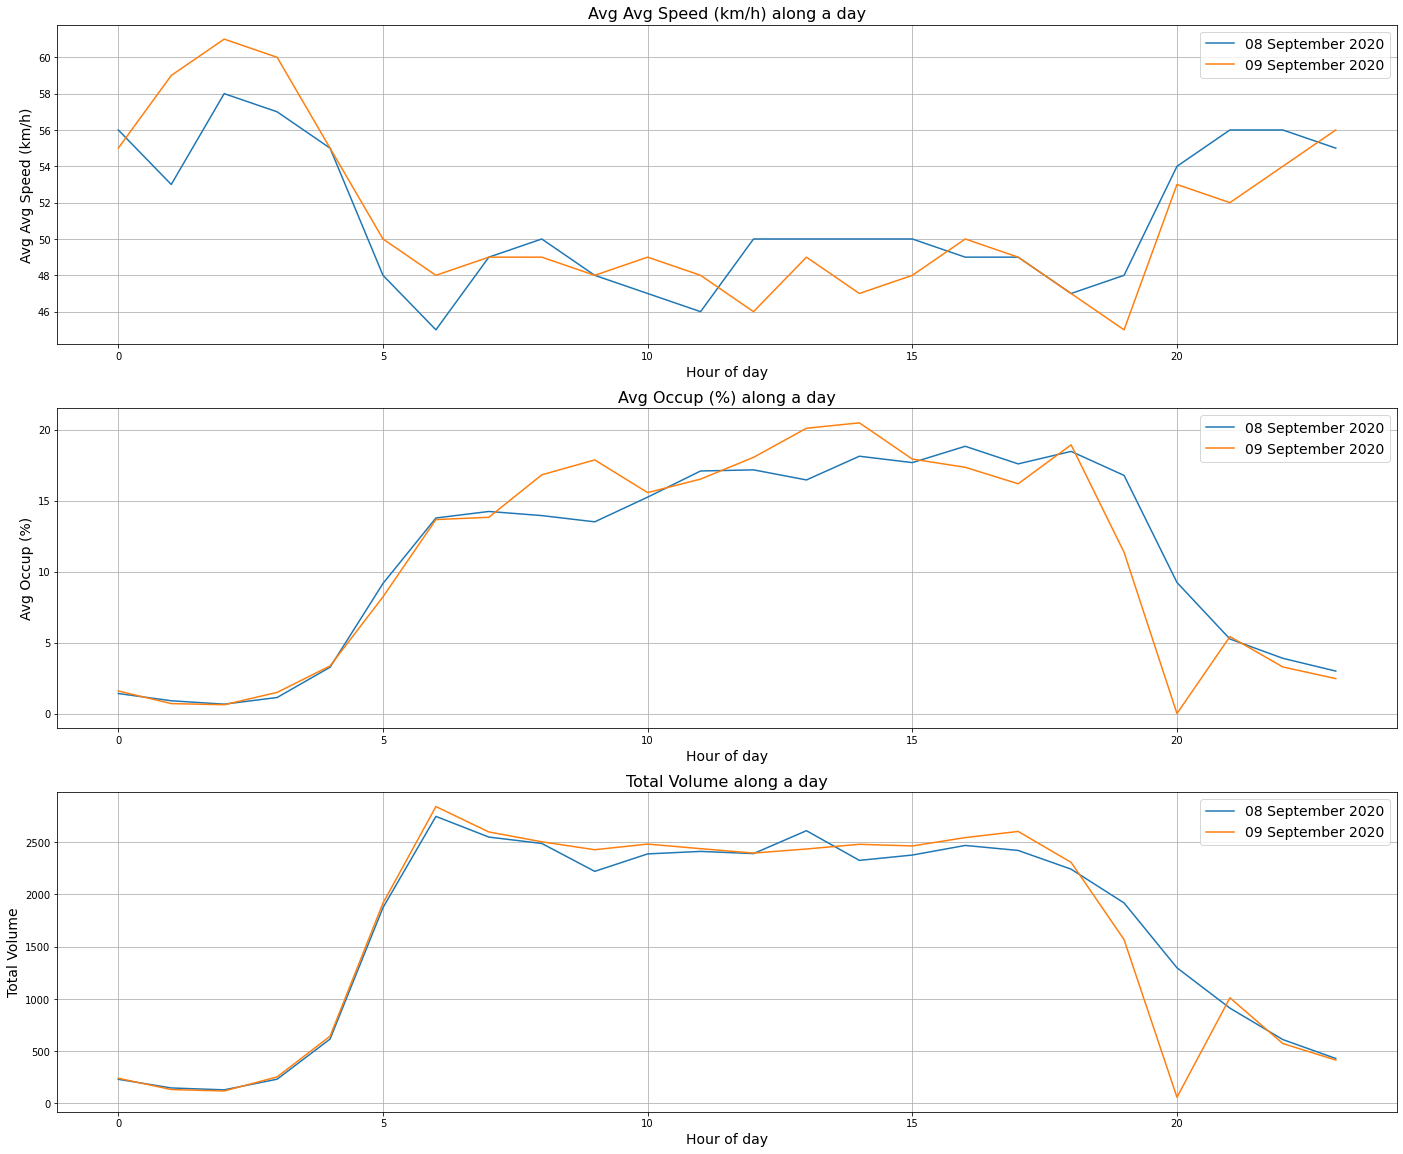

In [ ]:
f, axes = plt.subplots(3, 1, figsize=(24,20))

features = ["Avg Avg Speed (km/h)", "Avg Occup (%)", "Total Volume"]

for i, ax in enumerate(axes):
  ax.set_title("{} along a day".format(features[i]), fontsize=16)
  ax.plot(df_volumes_08_sep["Time (Beginning of Interval)"].index, df_volumes_08_sep[features[i]])
  ax.plot(df_volumes_09_sep["Time (Beginning of Interval)"].index, df_volumes_09_sep[features[i]])
  ax.set_xlabel("Hour of day", fontsize=14)
  ax.set_ylabel(features[i], fontsize=14)
  ax.legend(('08 September 2020', '09 September 2020'), fontsize=14)
  ax.grid(True)

plt.savefig("1_speed", dpi=100)

In [ ]:
count_by_length = [i for i in df_volumes_08_sep.columns if i.startswith("Volume")]
count_by_length

['Volume where length 0<=X<6m',
 'Volume where length 6<=X<11m',
 'Volume where length 11+m']

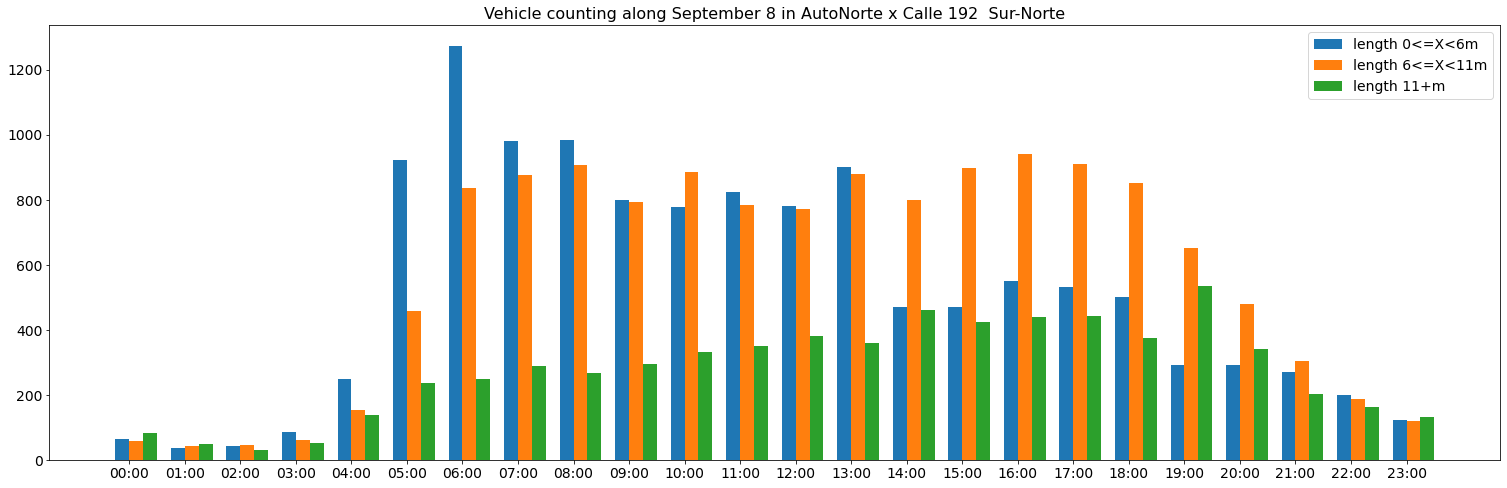

In [ ]:
width = 0.25         # the width of the bars
N = df_volumes_08_sep.shape[0]
total_vehicles_per_hour = df_volumes_08_sep[count_by_length].sum(axis=1)
ind = np.arange(N)    # the x locations for the groups

fig, ax = plt.subplots(figsize=(26,8))

count_length_0_6 = df_volumes_08_sep['Volume where length 0<=X<6m']
p1 = ax.bar(ind, count_length_0_6, width)

count_length_6_11 = df_volumes_08_sep['Volume where length 6<=X<11m']
p2 = ax.bar(ind + width, count_length_6_11, width)

count_length_11 = df_volumes_08_sep['Volume where length 11+m']
p3 = ax.bar((ind + width) + width, count_length_11, width)

ax.set_title('Vehicle counting along September 8 in {}'.format(sensor_zone), fontsize=16)
ax.set_xticks(ind + width / 2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels([str(i)[-5:] for i in df_volumes_08_sep["Time (Beginning of Interval)"]])

ax.legend((p1[0], p2[0], p3[0]), ('length 0<=X<6m', 'length 6<=X<11m', 'length 11+m'), fontsize=14)
ax.autoscale_view()

plt.savefig("2_vehicle_counting_08", dpi=100)
plt.show()

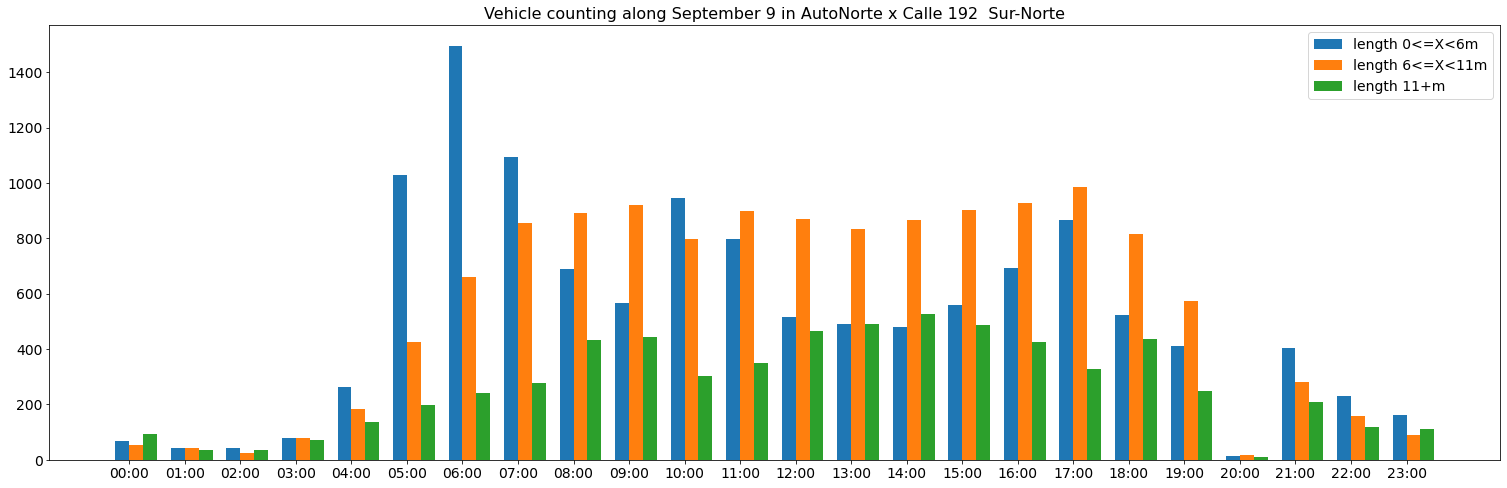

In [ ]:
N = df_volumes_08_sep.shape[0]
total_vehicles_per_hour = df_volumes_09_sep[count_by_length].sum(axis=1)
ind = np.arange(N)    # the x locations for the groups
width = 0.25         # the width of the bars

fig, ax = plt.subplots(figsize=(26,8))

count_length_0_6 = df_volumes_09_sep['Volume where length 0<=X<6m']
p1 = ax.bar(ind, count_length_0_6, width)

count_length_6_11 = df_volumes_09_sep['Volume where length 6<=X<11m']
p2 = ax.bar(ind + width, count_length_6_11, width)

count_length_11 = df_volumes_09_sep['Volume where length 11+m']
p3 = ax.bar((ind + width) + width, count_length_11, width)


ax.set_title('Vehicle counting along September 9 in {}'.format(sensor_zone), fontsize=16)
ax.set_xticks(ind + width / 2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels([str(i)[-5:] for i in df_volumes_09_sep["Time (Beginning of Interval)"]], fontsize=14)

ax.legend((p1[0], p2[0], p3[0]), ('length 0<=X<6m', 'length 6<=X<11m', 'length 11+m'), fontsize=14)
ax.autoscale_view()

plt.savefig("3_vehicle_counting_09", dpi=100)
plt.show()

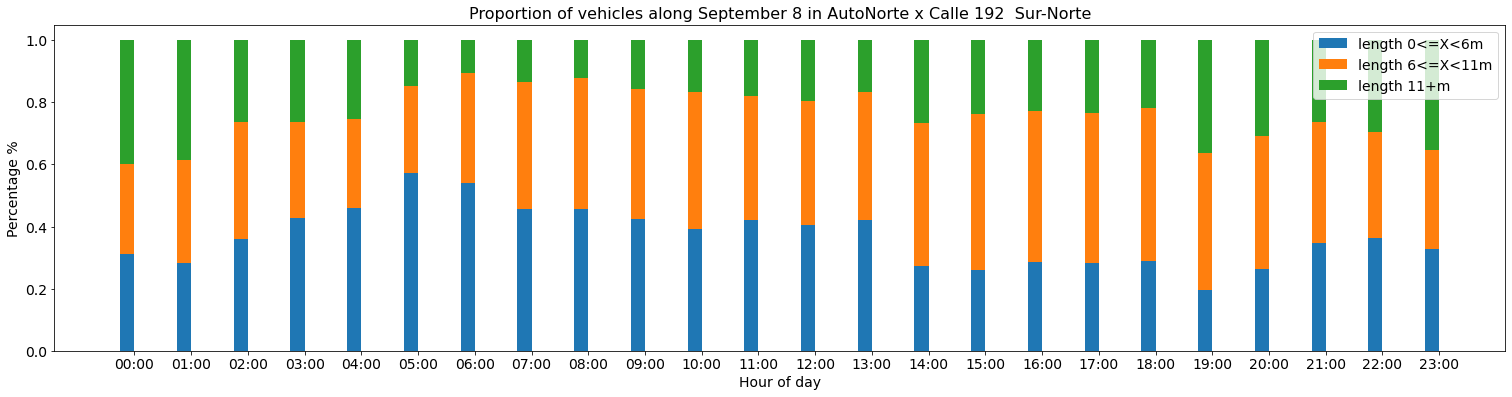

In [ ]:
N = df_volumes_08_sep.shape[0]
total_vehicles_per_hour = df_volumes_08_sep[count_by_length].sum(axis=1)
ind = np.arange(N)    # the x locations for the groups
width = 0.25         # the width of the bars

fig, ax = plt.subplots(figsize=(26,6))

count_length_0_6 = df_volumes_08_sep['Volume where length 0<=X<6m']/total_vehicles_per_hour
p1 = ax.bar(ind, count_length_0_6, width)

count_length_6_11 = df_volumes_08_sep['Volume where length 6<=X<11m']/total_vehicles_per_hour
p2 = ax.bar(ind, count_length_6_11, width, bottom=count_length_0_6)

count_length_11 = df_volumes_08_sep['Volume where length 11+m']/total_vehicles_per_hour
p3 = ax.bar(ind, count_length_11, width, bottom=count_length_0_6 + count_length_6_11)


ax.set_title('Proportion of vehicles along September 8 in {}'.format(sensor_zone), fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xlabel("Hour of day", fontsize=14)
ax.set_ylabel("Percentage %",fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0, fontsize=14)
ax.set_xticklabels([str(i)[-5:] for i in df_volumes_08_sep["Time (Beginning of Interval)"]], fontsize=14)

ax.legend((p1[0], p2[0], p3[0]), ('length 0<=X<6m', 'length 6<=X<11m', 'length 11+m'), fontsize=14)
ax.autoscale_view()

plt.savefig("4_proportion_of_vehicles_08", dpi=100)
plt.show()

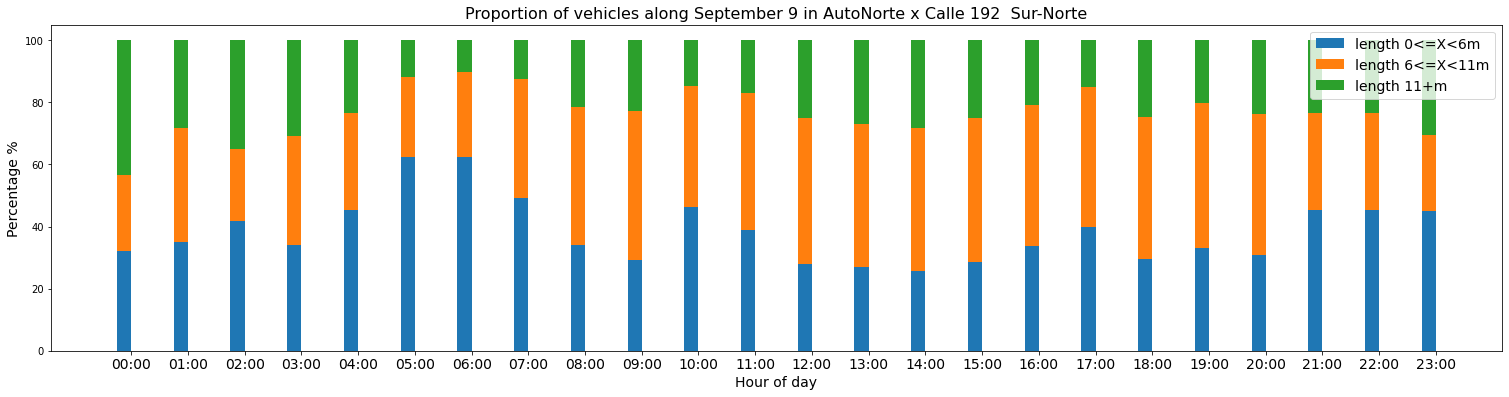

In [ ]:
N = df_volumes_09_sep.shape[0]
total_vehicles_per_hour = df_volumes_09_sep[count_by_length].sum(axis=1)
ind = np.arange(N)    # the x locations for the groups
width = 0.25         # the width of the bars

fig, ax = plt.subplots(figsize=(26,6))

count_length_0_6 = (df_volumes_09_sep['Volume where length 0<=X<6m']/total_vehicles_per_hour)*100
p1 = ax.bar(ind, count_length_0_6, width)

count_length_6_11 = (df_volumes_09_sep['Volume where length 6<=X<11m']/total_vehicles_per_hour)*100
p2 = ax.bar(ind, count_length_6_11, width, bottom=count_length_0_6)

count_length_11 = (df_volumes_09_sep['Volume where length 11+m']/total_vehicles_per_hour)*100
p3 = ax.bar(ind, count_length_11, width, bottom=count_length_0_6 + count_length_6_11)


ax.set_title('Proportion of vehicles along September 9 in {}'.format(sensor_zone), fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xlabel("Hour of day", fontsize=14)
ax.set_ylabel("Percentage %", fontsize=14)
plt.xticks(rotation=0)
ax.set_xticklabels([str(i)[-5:] for i in df_volumes_08_sep["Time (Beginning of Interval)"]], fontsize=14)

ax.legend((p1[0], p2[0], p3[0]), ('length 0<=X<6m', 'length 6<=X<11m', 'length 11+m'), fontsize=14)
ax.autoscale_view()

plt.savefig("5_proportion_of_vehicles_09", dpi=100)
plt.show()

In [ ]:
df_volumes_08_sep.head()

,Time (Beginning of Interval),Avg Occup (%),Total Volume,Median Speed (km/h),Avg Avg Speed (km/h),Volume where length 0<=X<6m,Volume where length 6<=X<11m,Volume where length 11+m,sensor_zone
0,09/08/2020 00:00,1.41,231,NaN,56,64,59,82,AutoNorte x Calle 192 Sur-Norte
1,09/08/2020 01:00,0.90,148,NaN,53,36,42,49,AutoNorte x Calle 192 Sur-Norte
2,09/08/2020 02:00,0.66,130,NaN,58,42,44,31,AutoNorte x Calle 192 Sur-Norte
3,09/08/2020 03:00,1.13,232,NaN,57,84,61,52,AutoNorte x Calle 192 Sur-Norte
4,09/08/2020 04:00,3.26,616,NaN,55,248,154,137,AutoNorte x Calle 192 Sur-Norte


## Bi-variate analisis: Correlation

In [ ]:
df_volumes_08_sep["total vehicle counting"] = df_volumes_08_sep[count_by_length].sum(axis=1)
df_volumes_09_sep["total vehicle counting"] = df_volumes_09_sep[count_by_length].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_volumes_08_sep[["Avg Occup (%)", "Avg Avg Speed (km/h)"]].corr(method="pearson").values[0,1]

-0.8475190803608048

In [ ]:
df_volumes_08_sep[["total vehicle counting", "Avg Avg Speed (km/h)"]].corr(method="pearson").values[0,1]

-0.8914914171418962

In [ ]:
df_volumes_09_sep[["Avg Occup (%)", "Avg Avg Speed (km/h)"]].corr(method="pearson").values[0,1]

-0.8563355202187415

In [ ]:
df_volumes_09_sep[["total vehicle counting", "Avg Avg Speed (km/h)"]].corr(method="pearson").values[0,1]

-0.8450608274899336

In [ ]:
a = map(["a"],[2])